<a href="https://colab.research.google.com/github/dkd99/hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

First we need to upload the hotel data to begin analysis.We will use reading command through which we can read comma seperated value files or excel file available in pandas library (This library can be acccesed through import pandas command).

Pandas converts csv file to a structured DataFrame.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hotel_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hotel Bookings.csv')

**Let's have a breif look at our Data before diving deep into it.**

In [4]:
hotel_df.shape

(119390, 32)

In [5]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


**Lets have a look at shape of the data.**

In [7]:
hotel_df.shape

(119390, 32)

We have exactly 119390 rows and 32 columns.Lets have a Look at what columns do we have in our Data.

In [8]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

**We have two types of Hotel -City hotel and resort hotel.**

In [9]:
hotel_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

**We have two values in is_canceled column-0 and 1.
0 represents that customer didn't cancel the booking.
1 represents that booking was canceled.**

In [21]:
hotel_df['is_canceled'].unique()

array([0, 1])

**Lead time is the time difference in hours between booking time of hotel and actual visit of the customer to hotel.**

In [22]:
hotel_df['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

**Then we have some columns which seem to extracted from some datetime object like 'arrival_date_year' , 'arrival_date_month','arrival_date_week_number' , 'arrival_date_day_of_month' which represent the date ,week,month and year of visit.Data is for visits made by customer in 3 years from 2015 august to 2017 august.**

**Then we have the duration of stay for the customer in columns 'stays_in_weekend_nights','stays_in_week_nights'.To analyse these columns we need to filter out these from those customer who have canceled their bookings i.e who have 'is_canceled'==1.**

In [23]:
hotel_df_isnotcanceled=hotel_df[hotel_df['is_canceled']==0]

In [269]:
hotel_df_isnotcanceled[['stays_in_week_nights','stays_in_weekend_nights']].max()

stays_in_week_nights       50
stays_in_weekend_nights    19
dtype: int64

In [267]:
hotel_df_isnotcanceled[['stays_in_weekend_nights','stays_in_week_nights']]

,stays_in_weekend_nights,stays_in_week_nights
0,0,0
1,0,0
2,0,1
3,0,1
4,0,2
...,...,...
119385,2,5
119386,2,5
119387,2,5
119388,2,5


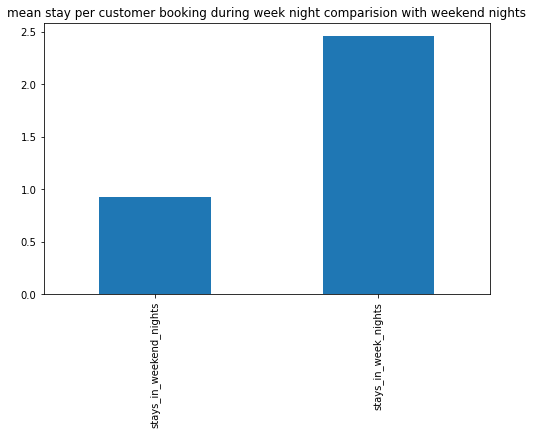

In [266]:
hotel_df_isnotcanceled[['stays_in_weekend_nights','stays_in_week_nights']].mean().plot(kind='bar',title='mean stay per customer booking during week night comparision with weekend nights')

In [275]:
hotel_df_isnotcanceled[['stays_in_week_nights','stays_in_weekend_nights']].describe()

,stays_in_week_nights,stays_in_weekend_nights
count,75166.000000,75166.000000
mean,2.464053,0.928971
std,1.924803,0.993371
min,0.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,1.000000
75%,3.000000,2.000000
max,50.000000,19.000000


**From above two decriptions, we can easily see that mean(stays_in_week_nights) <mean(stays_in_weekend_nights).**

**We have 680 customers who have booked the hotel and did not cancel it but they didn't  stay for  a single nights and there average daily rate is also 0.We will filter out these datas when analysing adr.**

In [26]:
hotel_df_isnotcanceled[hotel_df_isnotcanceled['stays_in_week_nights']+hotel_df_isnotcanceled['stays_in_weekend_nights']==0]['adr'].count()

680

From below code,we can see for these 680 customers adr is 0.


In [27]:
hotel_df_isnotcanceled[hotel_df_isnotcanceled['stays_in_week_nights']+hotel_df_isnotcanceled['stays_in_weekend_nights']==0]['adr'].value_counts()

0.0    680
Name: adr, dtype: int64

average size of such families-

In [270]:
hotel_df_isnotcanceled[hotel_df_isnotcanceled['stays_in_week_nights']+hotel_df_isnotcanceled['stays_in_weekend_nights']==0][['adults','children','babies']].describe()

,adults,children,babies
count,680.000000,680.000000,680.000000
mean,1.572059,0.072059,0.007353
std,0.680541,0.333388,0.085496
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000
max,3.000000,2.000000,1.000000


In [313]:
hotel_df_isnotcanceled[hotel_df_isnotcanceled['stays_in_week_nights']+hotel_df_isnotcanceled['stays_in_weekend_nights']>0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


All Customers whose 'reservation status' is 'No-Show' have 'is_canceled' values as 1.But such customers have 'adr'values non-zero.

In [273]:
hotel_df_isnotcanceled[hotel_df_isnotcanceled['reservation_status']=='No-Show']['adr']

Series([], Name: adr, dtype: float64)

In [30]:
hotel_df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [31]:
hotel_df[hotel_df['reservation_status']=='No-Show'][['adr','is_canceled','stays_in_weekend_nights','stays_in_week_nights']].mean()

adr                        96.378459
is_canceled                 1.000000
stays_in_weekend_nights     1.095278
stays_in_week_nights        2.613919
dtype: float64

**Description of those bookings who have not canceled their booking and stayed minimum 1 night.**

In [32]:
z=hotel_df_isnotcanceled[hotel_df_isnotcanceled['stays_in_week_nights']+hotel_df_isnotcanceled['stays_in_weekend_nights']>0]['stays_in_weekend_nights']+hotel_df_isnotcanceled[hotel_df_isnotcanceled['stays_in_week_nights']+hotel_df_isnotcanceled['stays_in_weekend_nights']>0]['stays_in_week_nights']

In [316]:
hotel_df_isnotcanceled[hotel_df_isnotcanceled['stays_in_week_nights']+hotel_df_isnotcanceled['stays_in_weekend_nights']>0][['stays_in_weekend_nights','hotel']].groupby('hotel').aggregate({'stays_in_weekend_nights':'mean'})

,stays_in_weekend_nights
hotel,
City Hotel,0.806054
Resort Hotel,1.148673


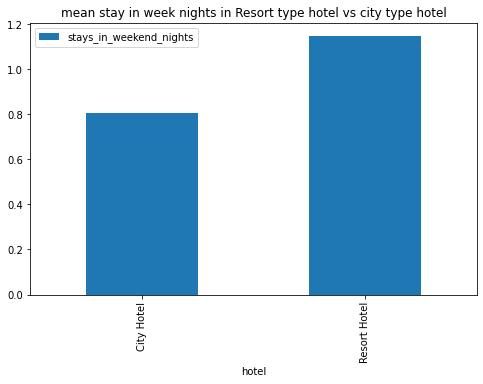

In [320]:
hotel_df_isnotcanceled[hotel_df_isnotcanceled['stays_in_week_nights']+hotel_df_isnotcanceled['stays_in_weekend_nights']>0][['stays_in_weekend_nights','hotel']].groupby('hotel').aggregate({'stays_in_weekend_nights':'mean'}).plot(kind='bar',title='mean stay in week nights in Resort type hotel vs city type hotel')

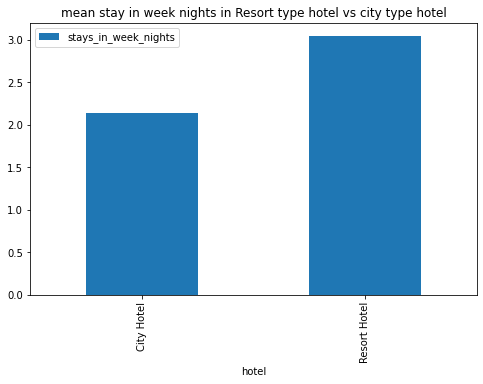

In [321]:
hotel_df_isnotcanceled[hotel_df_isnotcanceled['stays_in_week_nights']+hotel_df_isnotcanceled['stays_in_weekend_nights']>0][['stays_in_week_nights','hotel']].groupby('hotel').aggregate({'stays_in_week_nights':'mean'}).plot(kind='bar',title='mean stay in week nights in Resort type hotel vs city type hotel')

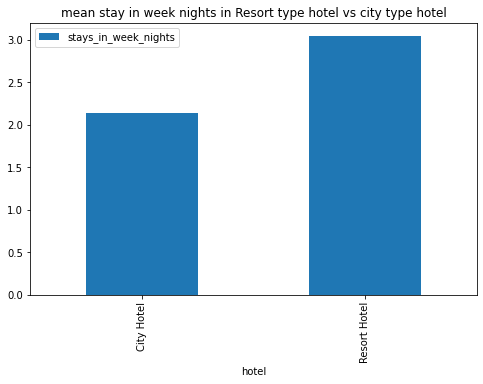

In [319]:
hotel_df_isnotcanceled[hotel_df_isnotcanceled['stays_in_week_nights']+hotel_df_isnotcanceled['stays_in_weekend_nights']>0][['stays_in_week_nights','hotel']].groupby('hotel').aggregate({'stays_in_week_nights':'mean'}).plot(kind='bar',title='mean stay in week nights in Resort type hotel vs city type hotel')

In [276]:
z.describe()

count    75166.000000
mean         3.393023
std          2.577671
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         69.000000
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'distribution plot of stays of customer who have not cancelled their bookings')]

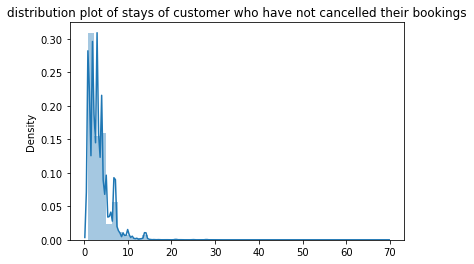

In [33]:
sns.distplot(z).set(title='distribution plot of stays of customer who have not cancelled their bookings')

**Market segment column-**

a group of people who share one or more common characteristics, lumped together for marketing purposes.From this analysis we can see Most people book their hotel through online TA.

In [35]:
hotel_df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

**'agent' column-**

This column has Nan values.But apart from Nan values if we look at the non null values we can realise that most customers book their hotel through some agent.

In [36]:
hotel_df.loc[~hotel_df['agent'].isna(),'agent'].count()

103050

In [37]:
hotel_df['agent'].nunique()

333

**Distribution_channel -**

A distribution channel is a chain of businesses or intermediaries through which a good or service passes until it reaches the final buyer or the end consumer

In [38]:
hotel_df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

**Deposite type**-This column is divided into 3 parts -No deposit,if there is deposit then weather it is refundable type or non -refundable type.

In [39]:
hotel_df['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

** 'required_car_parking_spaces' ** -

 Parking space required or not.Most people didn't require parking space. 

In [40]:
hotel_df['required_car_parking_spaces'].value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

**columns 'adults','children','babies'**-How many adults ,children ,babies are there in the visitors family.

**column 'is_repeated_guest'** - weather customer is new or has visited before.  0 means he is new ,1 means has visited before.

In [41]:
hotel_df['is_repeated_guest'].value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

 **column 'customer_type'-This has 4 subcategories** 

 1)transient-  these are guests who are predominantly on-the-move and seek short (and often urgent!) hotel-stays.

2)Transient party – when the booking is transient, but is associated to at least other transient booking.

3)contract-customer who is visiting hotel belongs to some company who has some ties with hotel.

4)Group


In [42]:
hotel_df['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

We can see City hotel has had twice the number of customers compared to Resort Hotel.

In [43]:
hotel_df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [44]:
labels = hotel_df['hotel'].value_counts().index.tolist()
sizes = hotel_df['hotel'].value_counts().tolist()
explode = (0, 0.05)

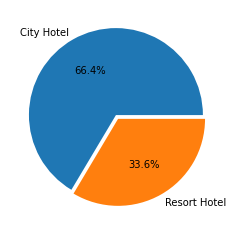

In [45]:
plt.pie(sizes,labels=labels,explode = explode,autopct='%1.1f%%')
plt.show()

[Text(0, 0.5, 'no of bookings'),
 Text(0.5, 1.0, 'resort hotel vs city hotel bookings comparision')]

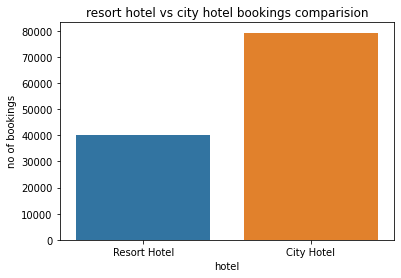

In [46]:
sns.countplot(data=hotel_df,x='hotel').set(title='resort hotel vs city hotel bookings comparision',ylabel='no of bookings')

**Lets look at Null values in our Data-**

We can have a look at some vital info regarding our Data.We can observe the following details-
**1)**We have 3 datatypes in our data which are int,float and object type.
**2)**Only **3** columns have  **null values**.They are agent and company.
**3)**Most of the customers visit through some agent.


In [47]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

We have only 3 columns in our data which have null values.And these values won't interfere in our analysis so leaving them as it is.

In [48]:
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Lets have a look at lead time column.Looks like we have lead time in hours.

**customers having lead time >500 hours **

In [49]:
hotel_df[hotel_df['lead_time']>500].shape

(481, 32)

**customers having 0 lead time=6345**

In [50]:
hotel_df[hotel_df['lead_time']==0].shape

(6345, 32)

In [51]:
plt.rcParams["figure.figsize"] = (10,5)


Text(0.5, 1.0, 'lead time variation wih customers')

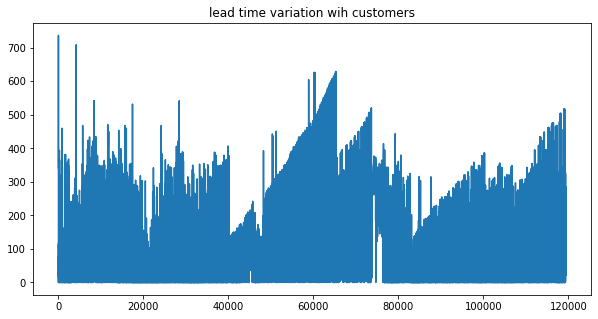

In [52]:
plt.plot(hotel_df['lead_time'])
plt.title('lead time variation wih customers')

**Lets have a look at distibution plot of Leadtime.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'distribution of lead times')]

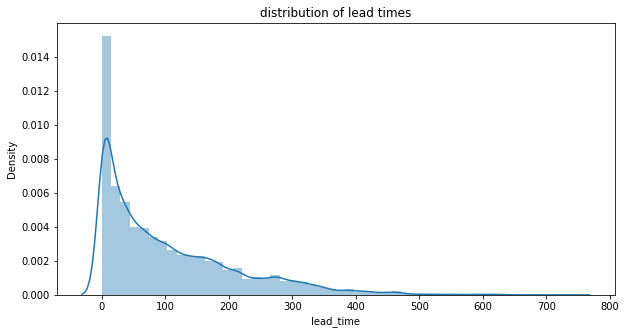

In [53]:
sns.distplot(hotel_df['lead_time'],hist=True ).set(title='distribution of lead times')


Lets have a look at number of hotel bookings that get cancelled.

In [54]:
hotel_df[hotel_df['is_canceled']!=0].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2015-05-29


Lets have a look at Monthly avg lead time for every month and then compare them to get some conclusion.

In [55]:
lead_time=hotel_df[['lead_time','arrival_date_month']].groupby('arrival_date_month').aggregate({'lead_time':'mean'}).rename(columns={'lead_time':'avg lead time'})
lead_time

,avg lead time
arrival_date_month,
April,94.822888
August,121.137710
December,73.561357
February,47.859569
January,45.310002
July,136.322565
June,128.247280
March,70.119257
May,117.646171


arrival_date_month
April        AxesSubplot(0.125,0.125;0.775x0.755)
August       AxesSubplot(0.125,0.125;0.775x0.755)
December     AxesSubplot(0.125,0.125;0.775x0.755)
February     AxesSubplot(0.125,0.125;0.775x0.755)
January      AxesSubplot(0.125,0.125;0.775x0.755)
July         AxesSubplot(0.125,0.125;0.775x0.755)
June         AxesSubplot(0.125,0.125;0.775x0.755)
March        AxesSubplot(0.125,0.125;0.775x0.755)
May          AxesSubplot(0.125,0.125;0.775x0.755)
November     AxesSubplot(0.125,0.125;0.775x0.755)
October      AxesSubplot(0.125,0.125;0.775x0.755)
September    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

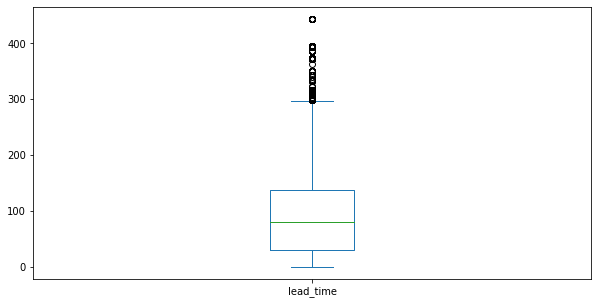

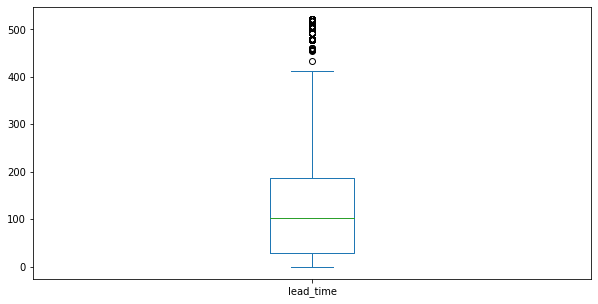

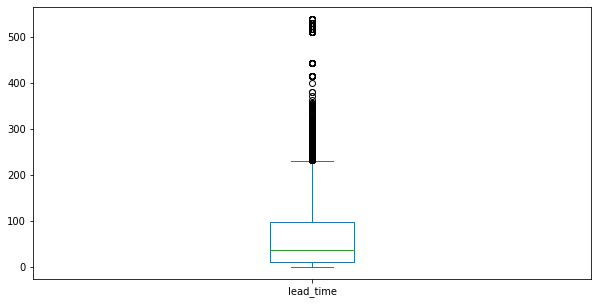

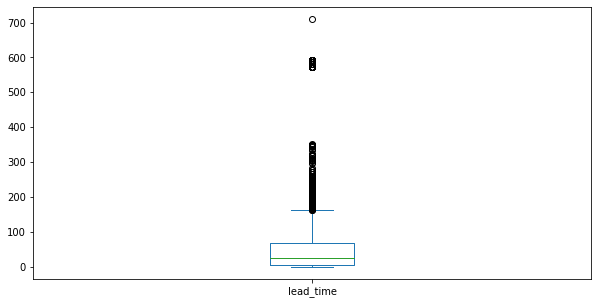

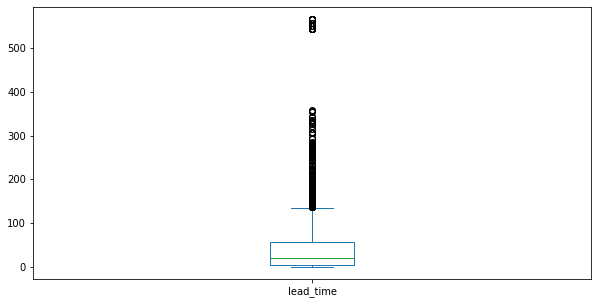

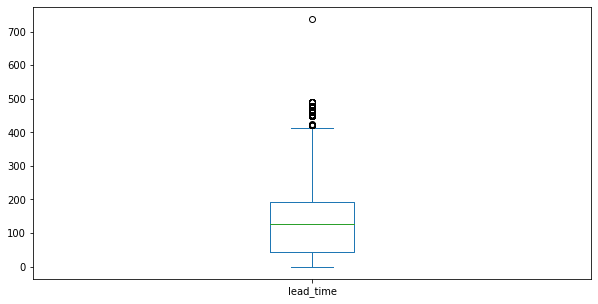

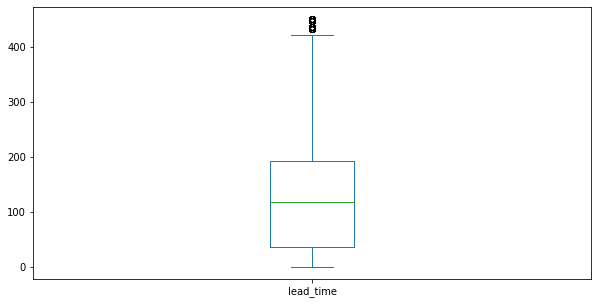

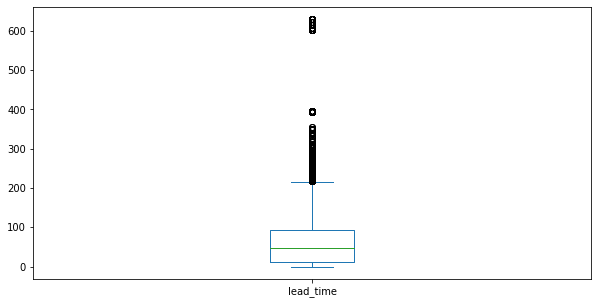

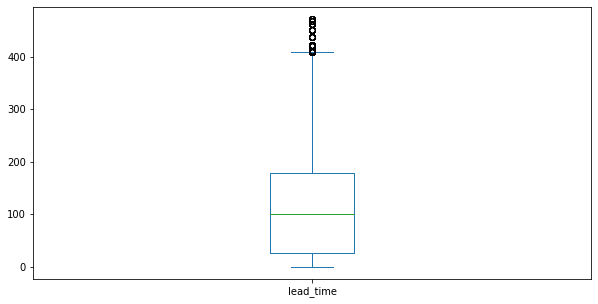

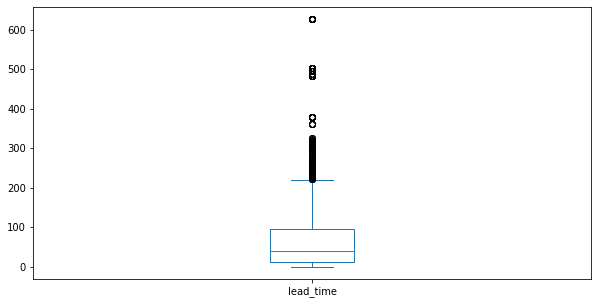

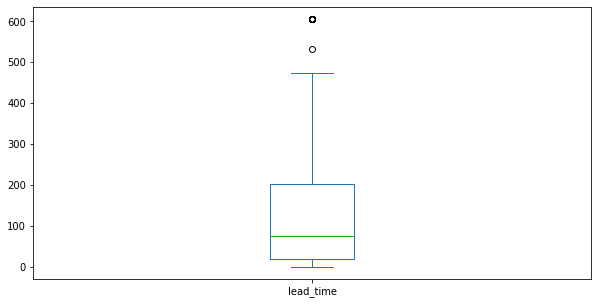

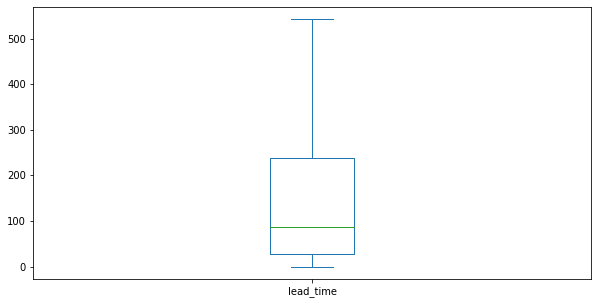

In [56]:
hotel_df[['lead_time','arrival_date_month']].groupby('arrival_date_month').plot(kind='box')

Plotting these on graph to have better visualisation.

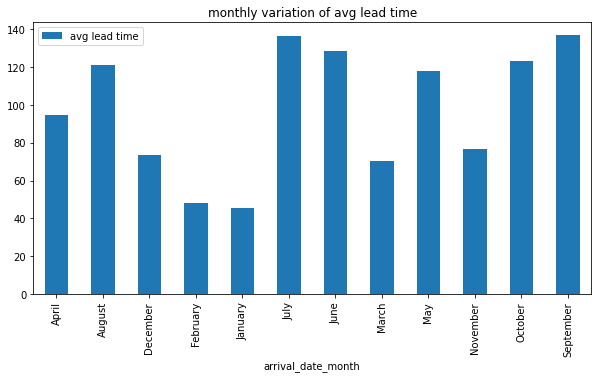

In [57]:
hotel_df[['lead_time','arrival_date_month']].groupby('arrival_date_month').aggregate({'lead_time':'mean'}).rename(columns={'lead_time':'avg lead time'}).plot(kind='bar',title='monthly variation of avg lead time')


In [61]:
df1=hotel_df[['arrival_date_month','adr']].groupby('arrival_date_month').aggregate({'adr':'count'}).rename(columns={'adr':'number of customer bookings'}).sort_values('number of customer bookings')
df1

,number of customer bookings
arrival_date_month,
January,5929
December,6780
November,6794
February,8068
March,9794
September,10508
June,10939
April,11089
October,11160


[Text(0.5, 1.0, 'yearly bookings')]

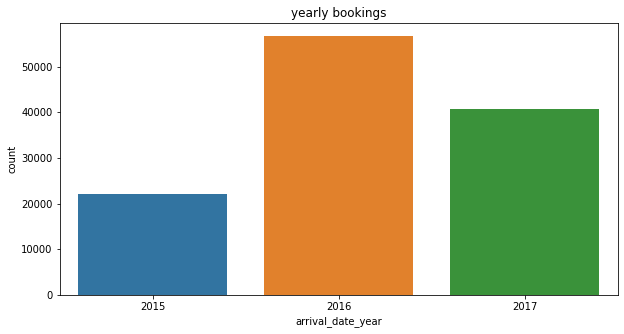

In [62]:
sns.countplot(data=hotel_df,x='arrival_date_year').set(title='yearly bookings')

Number of bookings  based on days in month.

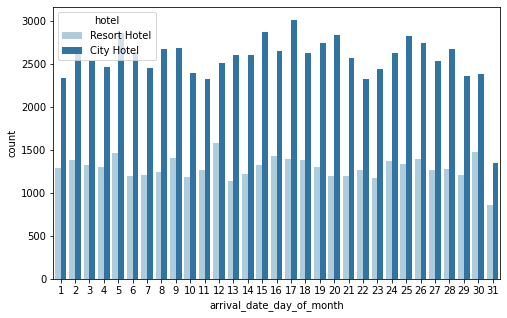

In [291]:
sns.countplot(data = hotel_df, x = 'arrival_date_day_of_month',hue='hotel',palette='Paired')


In [63]:
leadtime_booking=pd.concat([lead_time.sort_values('avg lead time'),df1],axis=1)
leadtime_booking

,avg lead time,number of customer bookings
arrival_date_month,,
January,45.310002,5929
February,47.859569,8068
March,70.119257,9794
December,73.561357,6780
November,76.580807,6794
April,94.822888,11089
May,117.646171,11791
August,121.137710,13877
October,122.994624,11160


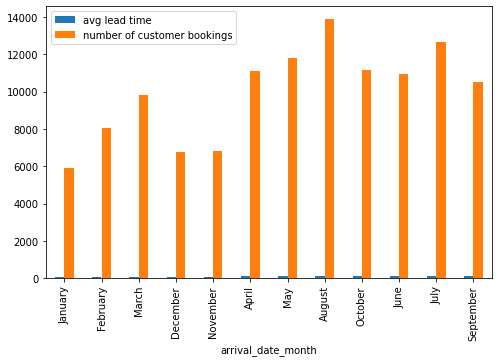

In [280]:
leadtime_booking.plot(kind='bar')

It is tough to visualise relation between monthly bookings and avg monthly leadtime through bar chart .So lets have a look at  relationship through correlation chart. 

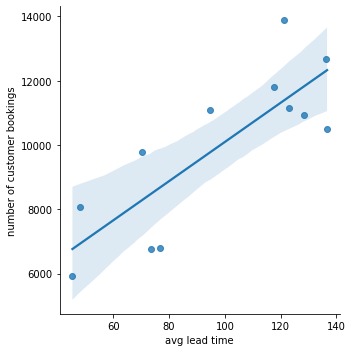

In [64]:
sns.lmplot(x="avg lead time",y='number of customer bookings',data=leadtime_booking)

In [29]:
leadtime_booking.corr()

,avg lead time,number of customer bookings
avg lead time,1.000000,0.815884
number of customer bookings,0.815884,1.000000


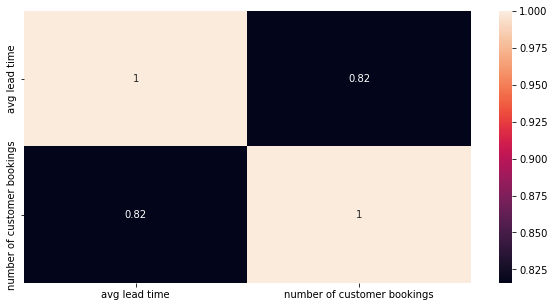

In [65]:
sns.heatmap(leadtime_booking.corr(),annot=True)

**Total number of bookings that get canceled.**

In [66]:
hotel_df[hotel_df['is_canceled']!=0]['is_canceled'].count()

44224

In [67]:
hotel_df[hotel_df['is_canceled']!=0]['is_canceled'].max()

1

**Lets campare which type of hotel gets canceled more.**

In [68]:
x=hotel_df[(hotel_df['is_canceled']!=0)&(hotel_df['hotel']=='Resort Hotel')]['is_canceled'].count()
x

11122

In [69]:
y=hotel_df[(hotel_df['is_canceled']!=0)&(hotel_df['hotel']=='City Hotel')]['is_canceled'].count()
y

33102

[Text(0.5, 1.0, 'cancelations vs hotel type chart')]

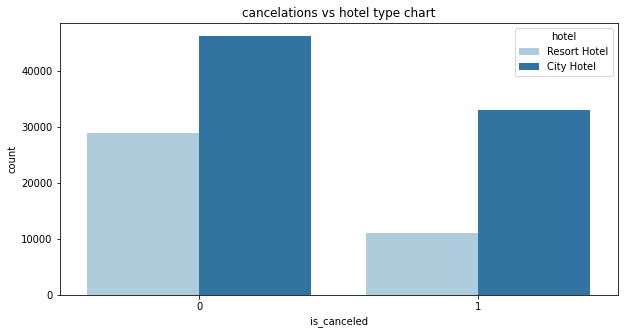

In [70]:
sns.countplot(data=hotel_df,x='is_canceled',hue='hotel',palette='Paired').set(title='cancelations vs hotel type chart')

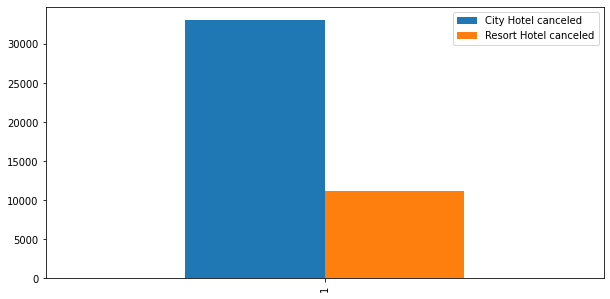

In [71]:
pd.DataFrame({'City Hotel canceled':y,'Resort Hotel canceled':x},index=['1']).plot(kind='bar')

[Text(0, 0.5, 'number of customers'),
 Text(0.5, 0, '0:not canceled,1:canceled'),
 Text(0.5, 1.0, 'number of canceled vs not canceled')]

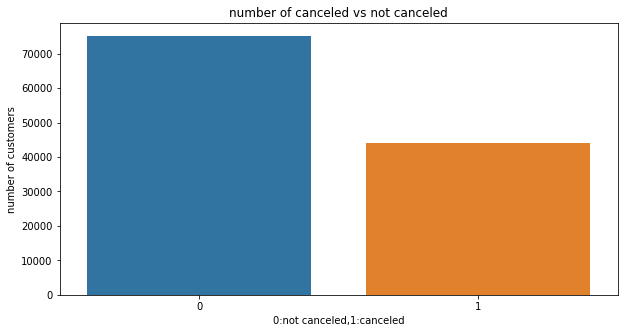

In [72]:
sns.countplot(data=hotel_df,x='is_canceled').set(title='number of canceled vs not canceled',ylabel='number of customers',xlabel='0:not canceled,1:canceled')

**Clearly,City hotel gets canceled more frequently.**

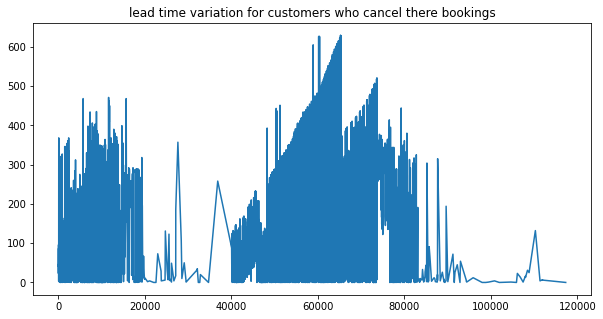

In [73]:
hotel_df[hotel_df['is_canceled']!=0]['lead_time'].plot(title='lead time variation for customers who cancel there bookings')

In [74]:
hotel_df['adr'].count()

119390

**Lets have look at monthly distribution of cancelations.**

In [75]:
df2=hotel_df[hotel_df['is_canceled']!=0].groupby('arrival_date_month').aggregate({'adr':'count'}).sort_values('adr').rename(columns={'adr':'monthly canceleations'})
df2

,monthly canceleations
arrival_date_month,
January,1807
November,2122
December,2371
February,2696
March,3149
September,4116
October,4246
April,4524
June,4535


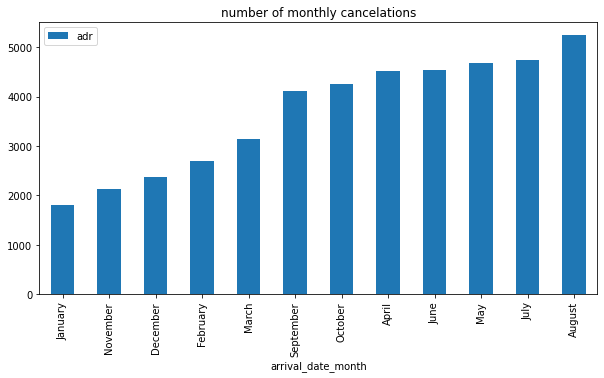

In [76]:
hotel_df[hotel_df['is_canceled']!=0].groupby('arrival_date_month').aggregate({'adr':'count'}).sort_values('adr').plot(kind='bar',title='number of monthly cancelations')

In [78]:
df1=hotel_df[['arrival_date_month','adr']].groupby('arrival_date_month').aggregate({'adr':'count'}).rename(columns={'adr':'number of customer bookings'}).sort_values('number of customer bookings')
df1

,number of customer bookings
arrival_date_month,
January,5929
December,6780
November,6794
February,8068
March,9794
September,10508
June,10939
April,11089
October,11160


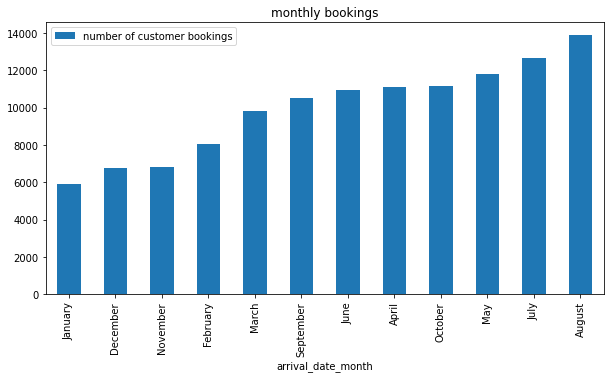

In [79]:
hotel_df[['arrival_date_month','adr']].groupby('arrival_date_month').aggregate({'adr':'count'}).rename(columns={'adr':'number of customer bookings'}).sort_values('number of customer bookings').plot(title='monthly bookings',kind='bar')

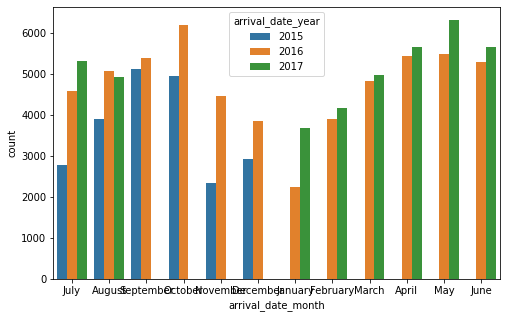

In [126]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,5
sns.countplot(data=hotel_df,x='arrival_date_month',hue='arrival_date_year')

In [81]:
df3=pd.concat([df1,df2],axis=1)
df3

,number of customer bookings,monthly canceleations
arrival_date_month,,
January,5929,1807
December,6780,2371
November,6794,2122
February,8068,2696
March,9794,3149
September,10508,4116
June,10939,4535
April,11089,4524
October,11160,4246


Let us look at percentage cancellations.

In [82]:
df3['% cancelations']=(df3['monthly canceleations']/df3['number of customer bookings'])*100
df3

,number of customer bookings,monthly canceleations,% cancelations
arrival_date_month,,,
January,5929,1807,30.477315
December,6780,2371,34.970501
November,6794,2122,31.233441
February,8068,2696,33.415964
March,9794,3149,32.152338
September,10508,4116,39.170156
June,10939,4535,41.457172
April,11089,4524,40.797186
October,11160,4246,38.046595


In [83]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
number of customer bookings,12.0,9949.166667,2521.813303,5929.000000,7749.500000,10723.500000,11317.750000,13877.000000
monthly canceleations,12.0,3685.333333,1183.407894,1807.000000,2614.750000,4181.000000,4570.500000,5239.000000
% cancelations,12.0,36.382769,3.809803,30.477315,33.100058,37.603357,39.294079,41.457172


In [84]:
df3['% cancelations'].mean()

36.38276919283068

Draw these on bar chart chart to visualise any relation between monthly bookings and cancellations.

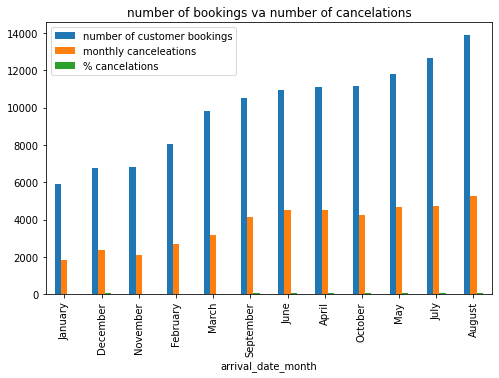

In [127]:
df3.plot(kind='bar',title='number of bookings va number of cancelations')


Lets have a look at correlation coefficient and heatmap.

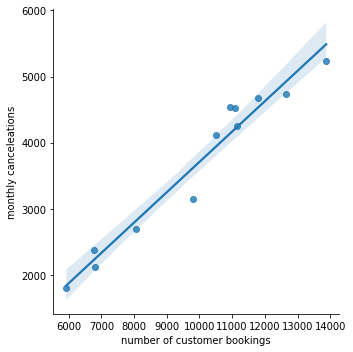

In [128]:
sns.lmplot(x='number of customer bookings',y='monthly canceleations',data=df3)

In [129]:
df3.corr()

,number of customer bookings,monthly canceleations,% cancelations
number of customer bookings,1.000000,0.977971,0.744308
monthly canceleations,0.977971,1.000000,0.864341
% cancelations,0.744308,0.864341,1.000000


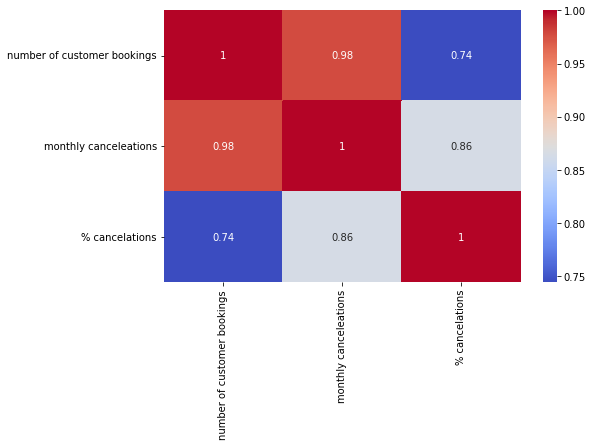

In [130]:
sns.heatmap(df3.corr(),annot=True,cmap='coolwarm')

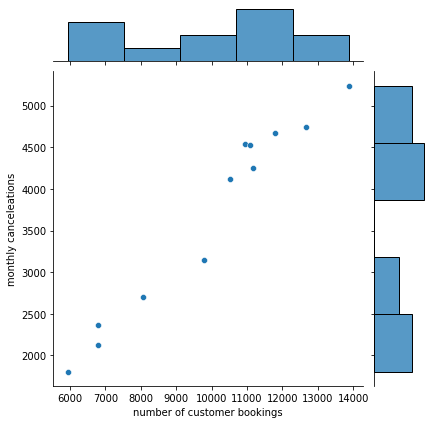

In [131]:
sns.jointplot(x='number of customer bookings',y='monthly canceleations',data=df3)

Let us analyse 'deposit_type' column and its relation with other columns.

In [132]:
hotel_df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [281]:
hotel_df['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

Let us represent value counts on pie chart.

([<matplotlib.patches.Wedge at 0x7efcc7e51310>,
 [Text(-1.064473906746513, 0.43519570523595025, 'No Deposit'),
  Text(1.1088095039352266, -0.45884799659900083, 'Non Refund'),
  Text(1.1999890976867778, -0.005115215818836994, 'Refundable')],
 [Text(-0.6016591646828116, 0.24598018122031967, '87.6%'),
  Text(0.6468055439622156, -0.2676613313494171, '12.2%'),
  Text(0.699993640317287, -0.00298387589432158, '0.1%')])

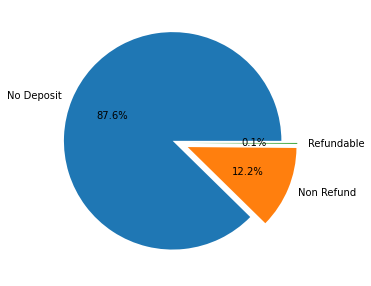

In [136]:
deposit_list=hotel_df['deposit_type'].value_counts().index.to_list()
depoit_count=hotel_df['deposit_type'].value_counts().to_list()
explode = (0.05, 0.1,0.1)
plt.pie(depoit_count,labels=deposit_list,explode=explode,autopct='%1.1f%%')

In [137]:
deposit_df=hotel_df[['deposit_type','adr']].groupby('deposit_type').aggregate({'adr':'count'}).rename(columns={'adr':'count'})

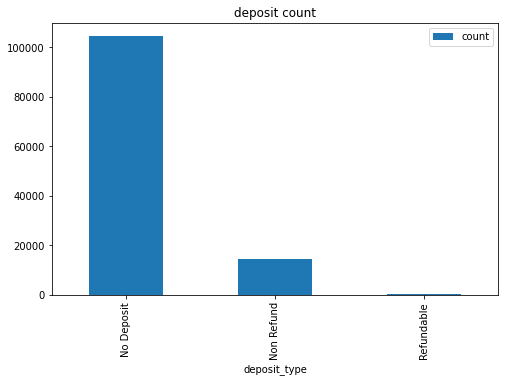

In [138]:
deposit_df.plot(kind='bar',title='deposit count')

How many had deposit_type refundable and booked Resort Hotel??

In [139]:
len(hotel_df[(hotel_df['deposit_type']=='Refundable')&(hotel_df['hotel']=='Resort')])

0

Answer is no one.We can easily look at these type of questions through countplot.

[Text(0.5, 1.0, 'Types of Deposit type in diff hotel type')]

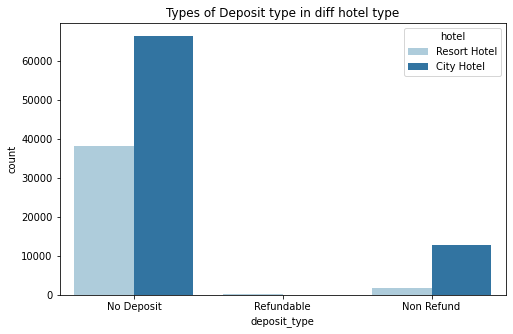

In [140]:
sns.countplot(data = hotel_df, x = 'deposit_type',hue='hotel', palette='Paired').set(title='Types of Deposit type in diff hotel type')


In [282]:
hotel_df[hotel_df['deposit_type']=='Non Refund'].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2133,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,Canceled,2015-08-12
2134,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,Canceled,2015-08-12
2135,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,Canceled,2015-08-12
2136,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,Canceled,2015-08-12
2141,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,Canceled,2015-08-12


In [142]:
hotel_df[(hotel_df['is_canceled']==1)&(hotel_df['deposit_type']=='Non Refund')].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2133,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,Canceled,2015-08-12
2134,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,Canceled,2015-08-12
2135,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,Canceled,2015-08-12
2136,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,Canceled,2015-08-12
2141,Resort Hotel,1,87,2015,October,40,3,0,1,2,...,Non Refund,96.0,NaN,0,Transient,36.05,0,0,Canceled,2015-08-12


How many customers who have some deposits cancelled the booking and had non-refund type booking.

In [143]:
len(hotel_df[(hotel_df['is_canceled']==1)&(hotel_df['deposit_type']=='Non Refund')])

14494

In [144]:
hotel_df[(hotel_df['is_canceled']==0)&(hotel_df['deposit_type']=='Non Refund')].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4804,Resort Hotel,0,0,2016,April,14,1,0,2,1,...,Non Refund,NaN,223.0,0,Transient-Party,60.0,0,0,Check-Out,2016-04-03
4825,Resort Hotel,0,171,2016,April,15,4,1,1,1,...,Non Refund,298.0,NaN,0,Transient-Party,54.5,0,0,Check-Out,2016-04-06
4826,Resort Hotel,0,171,2016,April,15,4,1,1,2,...,Non Refund,298.0,NaN,0,Transient-Party,85.0,0,0,Check-Out,2016-04-06
4827,Resort Hotel,0,171,2016,April,15,4,1,1,2,...,Non Refund,298.0,NaN,0,Transient-Party,85.0,0,0,Check-Out,2016-04-06
4828,Resort Hotel,0,171,2016,April,15,4,1,1,2,...,Non Refund,298.0,NaN,0,Transient-Party,85.0,0,0,Check-Out,2016-04-06


Only 36 customers have Refundable deposits and cancelled their booking.And 126 who have rufundable deposits didn't cancelled their bookings.

In [284]:
len(hotel_df[(hotel_df['is_canceled']==0)&(hotel_df['deposit_type']=='Refundable')])

126

[Text(0, 0.5, 'number of customers'),
 Text(0.5, 1.0, 'canceled booking vs what type of deposit')]

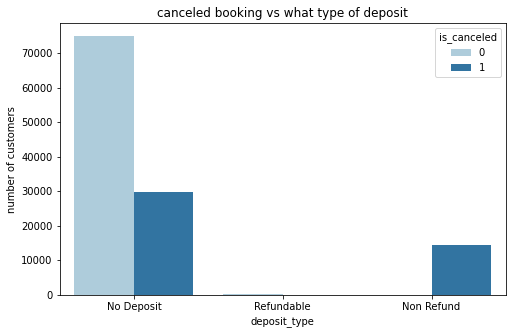

In [146]:
sns.countplot(data=hotel_df,x='deposit_type',hue='is_canceled',palette='Paired').set(title='canceled booking vs what type of deposit',ylabel='number of customers')

In [285]:
hotel_df[(hotel_df['is_canceled']==1)&(hotel_df['deposit_type']=='Refundable')].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4769,Resort Hotel,1,169,2016,March,14,31,1,3,2,...,Refundable,NaN,223.0,0,Transient-Party,46.0,0,0,Canceled,2016-03-24
4774,Resort Hotel,1,169,2016,March,14,31,1,3,2,...,Refundable,NaN,223.0,0,Transient-Party,46.0,0,0,Canceled,2016-03-24
4775,Resort Hotel,1,169,2016,March,14,31,1,3,2,...,Refundable,NaN,223.0,0,Transient-Party,46.0,0,0,Canceled,2016-03-24
4776,Resort Hotel,1,169,2016,March,14,31,1,3,2,...,Refundable,NaN,223.0,0,Transient-Party,46.0,0,0,Canceled,2016-03-24
4777,Resort Hotel,1,169,2016,March,14,31,1,3,2,...,Refundable,NaN,223.0,0,Transient-Party,46.0,0,0,Canceled,2016-03-24


In [290]:
hotel_df[(hotel_df['is_canceled']==0)&(hotel_df['deposit_type']=='Refundable')].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1559,Resort Hotel,0,14,2015,September,36,4,0,2,3,...,Refundable,96.0,NaN,0,Transient-Party,128.0,1,0,Check-Out,2015-09-06
4737,Resort Hotel,0,169,2016,March,14,31,0,3,2,...,Refundable,NaN,223.0,0,Transient-Party,66.0,0,0,Check-Out,2016-04-03
4738,Resort Hotel,0,169,2016,March,14,31,0,3,2,...,Refundable,NaN,223.0,0,Transient-Party,66.0,0,0,Check-Out,2016-04-03
4739,Resort Hotel,0,169,2016,March,14,31,0,3,2,...,Refundable,NaN,223.0,0,Transient-Party,66.0,0,0,Check-Out,2016-04-03
4740,Resort Hotel,0,169,2016,March,14,31,0,3,2,...,Refundable,NaN,223.0,0,Transient-Party,66.0,0,0,Check-Out,2016-04-03


Let us analyse bookings and cancellations in a little bit more detail.

In [151]:
df5=hotel_df[['arrival_date_year','arrival_date_month','adr']].groupby(['arrival_date_year','arrival_date_month']).aggregate({'adr':'count'}).rename(columns={'adr':'number of customer bookings'})
df5

number of customer bookings
arrival_date_year arrival_date_month                             
2015              August                                     3889
                  December                                   2920
                  July                                       2776
                  November                                   2340
                  October                                    4957
                  September                                  5114
2016              April                                      5428
                  August                                     5063
                  December                                   3860
                  February                                   3891
                  January                                    2248
                  July                                       4572
                  June                                       5292
                  March                                      4824
                  May                                        5478
                  November                                   4454
                  October                                    6203
                  September                                  5394
2017              April                                      5661
                  August                                     4925
                  February                                   4177
                  January                                    3681
                  July                                       5313
                  June                                       5647
                  March                                      4970
                  May                                        6313

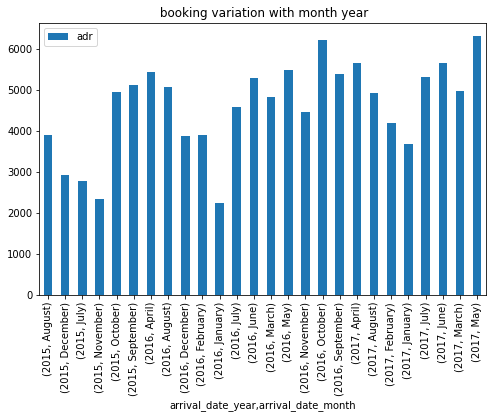

In [152]:
hotel_df[['arrival_date_year','arrival_date_month','adr']].groupby(['arrival_date_year','arrival_date_month']).aggregate({'adr':'count'}).plot(kind='bar',title=' booking variation with month year')

In [153]:
df6=hotel_df[hotel_df['is_canceled']!=0][['arrival_date_year','arrival_date_month','adr']].groupby(['arrival_date_year','arrival_date_month']).aggregate({'adr':'count'}).rename(columns={'adr':'number of customer cancelations'})
df6

number of customer cancelations
arrival_date_year arrival_date_month                                 
2015              August                                         1598
                  December                                        973
                  July                                           1259
                  November                                        486
                  October                                        1732
                  September                                      2094
2016              April                                          2061
                  August                                         1825
                  December                                       1398
                  February                                       1337
                  January                                         557
                  July                                           1499
                  June                                           2096
                  March                                          1477
                  May                                            1915
                  November                                       1636
                  October                                        2514
                  September                                      2022
2017              April                                          2463
                  August                                         1816
                  February                                       1359
                  January                                        1250
                  July                                           1984
                  June                                           2439
                  March                                          1672
                  May                                            2762

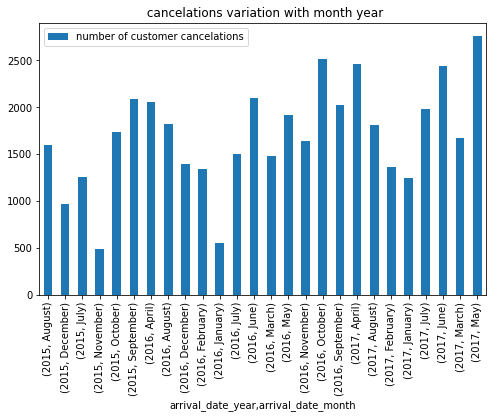

In [154]:
hotel_df[hotel_df['is_canceled']!=0][['arrival_date_year','arrival_date_month','adr']].groupby(['arrival_date_year','arrival_date_month']).aggregate({'adr':'count'}).rename(columns={'adr':'number of customer cancelations'}).plot(kind='bar',title=' cancelations variation with month year')

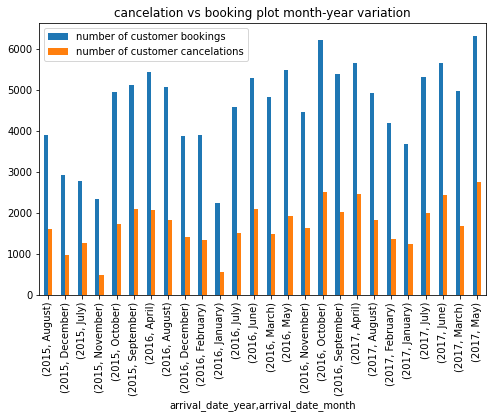

In [155]:
pd.concat([df5,df6],axis=1).plot(kind='bar',title='cancelation vs booking plot month-year variation')

Let's analyse waiting list column.Which hotel type has more waiting list.City hotel or Resort Hotel.

In [295]:
wait_list_df=hotel_df[hotel_df['days_in_waiting_list']>0]

Mean waiting days for different hotel type.

In [297]:
hotel_df[['days_in_waiting_list','hotel']].groupby('hotel').describe()

days_in_waiting_list                                          \
                            count      mean       std  min  25%  50%  75%   
hotel                                                                       
City Hotel                79330.0  3.226774  20.87089  0.0  0.0  0.0  0.0   
Resort Hotel              40060.0  0.527758   7.42858  0.0  0.0  0.0  0.0   

                     
                max  
hotel                
City Hotel    391.0  
Resort Hotel  185.0

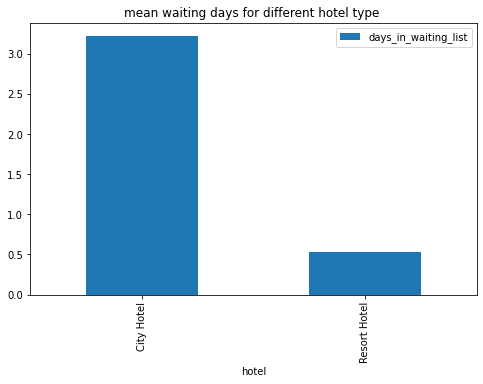

In [304]:
hotel_df[['days_in_waiting_list','hotel']].groupby('hotel').mean().plot(kind='bar',title='mean waiting days for different hotel type ')

How many customers have to wait for their bookings to get confirmed for different hotel types.

In [301]:
wait_list_df[['days_in_waiting_list','hotel']].groupby('hotel').count()

,days_in_waiting_list
hotel,
City Hotel,3443
Resort Hotel,255


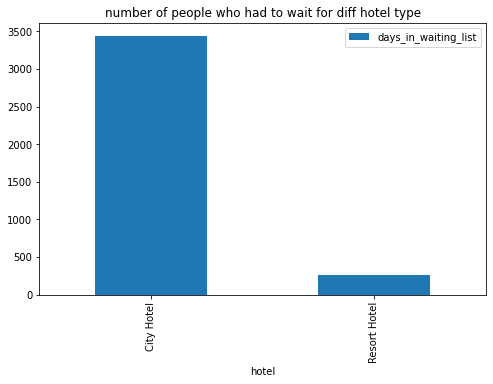

In [303]:
wait_list_df[['days_in_waiting_list','hotel']].groupby('hotel').count().plot(kind='bar',title='number of people who had to wait for diff hotel type')

Monthly average for waiting days for all months.

In [307]:
hotel_df[['arrival_date_month','days_in_waiting_list']].groupby('arrival_date_month').aggregate({'days_in_waiting_list':'mean'})

,days_in_waiting_list
arrival_date_month,
April,3.012445
August,0.398717
December,3.007522
February,0.764874
January,2.526396
July,0.229919
June,1.955115
March,1.376965
May,4.339072


In [310]:
hotel_df[['arrival_date_day_of_month','days_in_waiting_list']].groupby('arrival_date_day_of_month').aggregate({'days_in_waiting_list':'mean'})

,days_in_waiting_list
arrival_date_day_of_month,
1,1.584666
2,1.173366
3,0.622827
4,3.040128
5,2.964095
6,0.135403
7,3.497408
8,1.109921
9,2.341797


In [308]:
waitingtime_df=hotel_df[['days_in_waiting_list','arrival_date_month']].groupby('arrival_date_month').aggregate({'days_in_waiting_list':['min','max','mean']})
waitingtime_df

days_in_waiting_list               
                                    min  max      mean
arrival_date_month                                    
April                                 0  224  3.012445
August                                0  147  0.398717
December                              0  167  3.007522
February                              0  165  0.764874
January                               0   91  2.526396
July                                  0   96  0.229919
June                                  0  117  1.955115
March                                 0  223  1.376965
May                                   0  259  4.339072
November                              0  116  1.767736
October                               0  391  4.598835
September                             0  379  4.221926

There isn't any particular trend followed by days in waiting list .It seems random.

In [160]:
pd.concat([waitingtime_df,df1],axis=1).corr()

,"(days_in_waiting_list, min)","(days_in_waiting_list, max)","(days_in_waiting_list, mean)",number of customer bookings
"(days_in_waiting_list, min)",NaN,NaN,NaN,NaN
"(days_in_waiting_list, max)",NaN,1.000000,0.754568,0.269941
"(days_in_waiting_list, mean)",NaN,0.754568,1.000000,-0.081161
number of customer bookings,NaN,0.269941,-0.081161,1.000000


In [161]:
mean_waiting_days=hotel_df[['days_in_waiting_list','arrival_date_month']].groupby('arrival_date_month').aggregate({'days_in_waiting_list':'mean'})

In [162]:
pd.concat([mean_waiting_days,df1],axis=1).corr()

,days_in_waiting_list,number of customer bookings
days_in_waiting_list,1.000000,-0.081161
number of customer bookings,-0.081161,1.000000


**Let us analyse customer_type column now.**

([<matplotlib.patches.Wedge at 0x7efcc7721250>,
 [Text(-0.8146799318246912, 0.8116628663935026, 'Transient'),
  Text(0.7402968691062715, -0.9444366286794748, 'Transient-Party'),
  Text(1.18865426397428, -0.16462393731096034, 'Contract'),
  Text(1.1998616892720384, -0.018218853346205544, 'Group')],
 [Text(-0.4604712658139558, 0.45876596796154484, '75.1%'),
  Text(0.4318398403119917, -0.5509213667296935, '21.0%'),
  Text(0.6933816539849966, -0.09603063009806018, '3.4%'),
  Text(0.6999193187420223, -0.010627664451953234, '0.5%')])

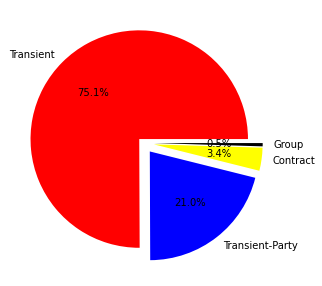

In [163]:
size=hotel_df['customer_type'].value_counts().tolist()
labels=hotel_df['customer_type'].value_counts().index.tolist()
explode = (0.05, 0.1,0.1,0.1)
color=['red','blue','yellow','black']
plt.pie(size,labels=labels,explode=explode,autopct='%1.1f%%',colors=color)

In [164]:
hotel_df[['customer_type','hotel','adr']].groupby(['customer_type','hotel']).aggregate({'adr':'count'}).rename(columns={'adr':'count'})

count
customer_type   hotel              
Contract        City Hotel     2300
                Resort Hotel   1776
Group           City Hotel      293
                Resort Hotel    284
Transient       City Hotel    59404
                Resort Hotel  30209
Transient-Party City Hotel    17333
                Resort Hotel   7791

[Text(0.5, 1.0, 'customer type in different hotel type')]

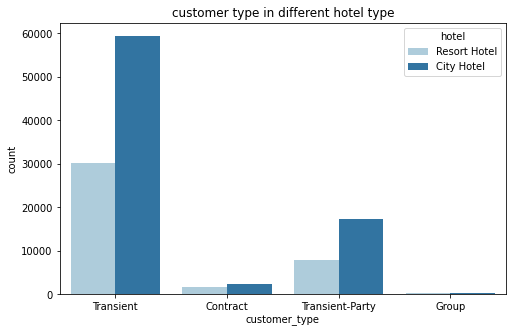

In [165]:
sns.countplot(x='customer_type',data=hotel_df,hue='hotel',palette='Paired').set(title='customer type in different hotel type')

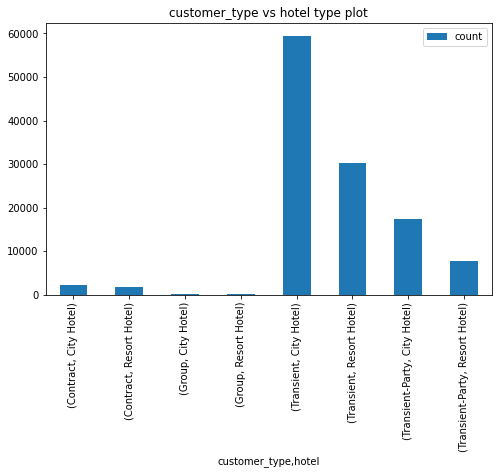

In [166]:
hotel_df[['customer_type','hotel','adr']].groupby(['customer_type','hotel']).aggregate({'adr':'count'}).rename(columns={'adr':'count'}).plot(kind='bar',title='customer_type vs hotel type plot')

What customer type prefer what type of hotel type ?

[Text(0.5, 1.0, 'customer_type vs hotel type plot')]

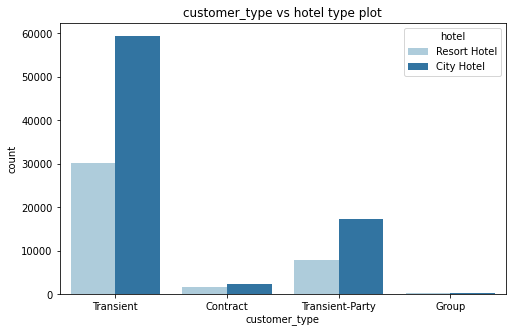

In [167]:
sns.countplot(data=hotel_df,x='customer_type',hue='hotel',palette='Paired').set(title='customer_type vs hotel type plot')

Lets have a look at how many people require Parking space.Which type of hotel do these guys prefer?

In [169]:
sizes=hotel_df['required_car_parking_spaces'].value_counts().tolist()
sizes

[111974, 7383, 28, 3, 2]

([<matplotlib.patches.Wedge at 0x7efcc7503990>,
 [Text(-1.1281730957450355, 0.2229920761755069, '0'),
  Text(1.1770216204420754, -0.2337094457053702, '1'),
  Text(1.199999400289608, -0.0011997102071846545, '2'),
  Text(1.5999999729051988, -0.000294454348115866, '3'),
  Text(1.1999999983484246, -6.295856530532522e-05, '8')],
 [Text(-0.637663054116759, 0.1260389995774604, '93.8%'),
  Text(0.6865959452578771, -0.13633050999479926, '6.2%'),
  Text(0.699999650168938, -0.0006998309541910485, '0.0%'),
  Text(1.099999981372324, -0.00020243736432965783, '0.0%'),
  Text(0.699999999036581, -3.672582976143971e-05, '0.0%')])

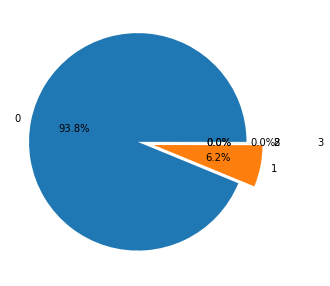

In [170]:
sizes=hotel_df['required_car_parking_spaces'].value_counts().tolist()
labels=hotel_df['required_car_parking_spaces'].value_counts().index.tolist()
explode=(0.05,0.1,0.1,0.5,0.1)
plt.pie(sizes,labels=labels,explode=explode,autopct='%1.1f%%')

[Text(0, 0.5, 'no of customers'),
 Text(0.5, 0, 'amount of parking space required'),
 Text(0.5, 1.0, 'parking space required')]

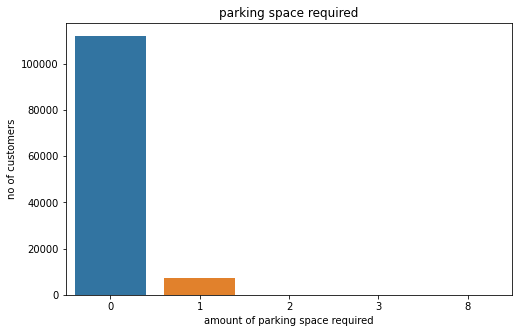

In [171]:
sns.countplot(data=hotel_df,x='required_car_parking_spaces').set(title='parking space required',ylabel='no of customers',xlabel='amount of parking space required')

What customer types require parking spece most??

In [172]:
hotel_df[hotel_df['required_car_parking_spaces']!=0].groupby('customer_type').aggregate({'adr':'count'}).rename(columns={'adr':'count'})

,count
customer_type,
Contract,134
Group,51
Transient,6420
Transient-Party,811


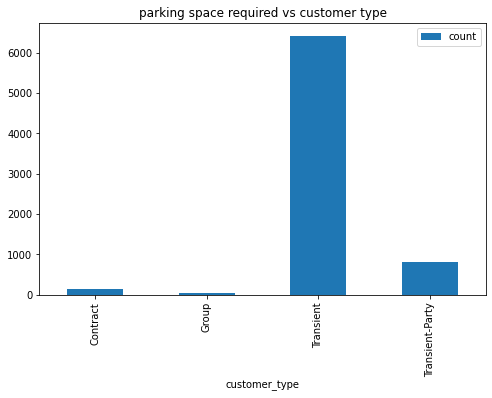

In [173]:
hotel_df[hotel_df['required_car_parking_spaces']!=0].groupby('customer_type').aggregate({'adr':'count'}).rename(columns={'adr':'count'}).plot(kind='bar',title='parking space required vs customer type')

In [174]:
hotel_df[hotel_df['required_car_parking_spaces']!=0].groupby('hotel').aggregate({'adr':'count'}).rename(columns={'adr':'count'})

,count
hotel,
City Hotel,1926
Resort Hotel,5490


Clearly we can see customers who require parking space visit Resort type hotel more. 

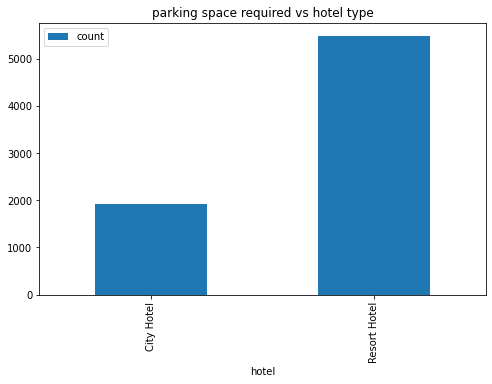

In [175]:
hotel_df[hotel_df['required_car_parking_spaces']!=0].groupby('hotel').aggregate({'adr':'count'}).rename(columns={'adr':'count'}).plot(kind='bar',title='parking space required vs hotel type')

Let's look at How many nights do customer visit?Which type of hotel have longer staying customers?

In [177]:
hotel_df.iloc[14038]

hotel                             Resort Hotel
is_canceled                                  0
lead_time                                  126
arrival_date_year                         2016
arrival_date_month                        July
arrival_date_week_number                    28
arrival_date_day_of_month                    5
stays_in_weekend_nights                     19
stays_in_week_nights                        50
adults                                       1
children                                   0.0
babies                                       0
meal                                        HB
country                                    NaN
market_segment                          Direct
distribution_channel                    Direct
is_repeated_guest                            0
previous_cancellations                       0
previous_bookings_not_canceled               1
reserved_room_type                           E
assigned_room_type                           E
booking_chang

In [178]:
z=hotel_df[hotel_df['is_canceled']!=1]['stays_in_week_nights']+hotel_df[hotel_df['is_canceled']!=1]['stays_in_weekend_nights']
z.idxmax()

14038

In [179]:
z.mode()

0    1
dtype: int64

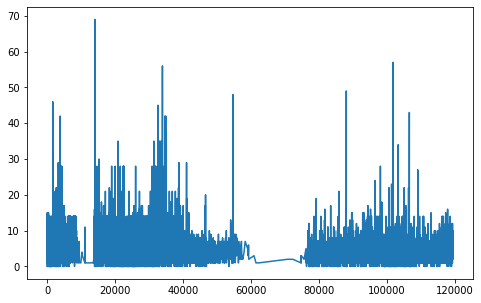

In [180]:
z.plot()

Distribution type for number of nights stay booked by different customers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'distribution of stays')]

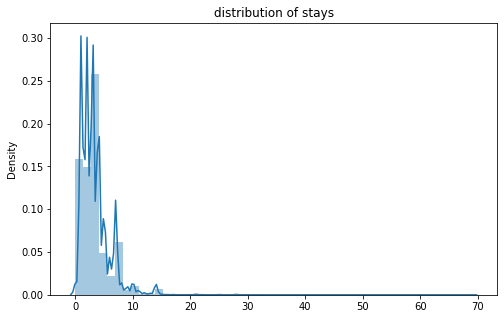

In [181]:
sns.distplot(z,hist=True ).set(title='distribution of stays')


How many customers Revisit??

In [322]:
hotel_df[hotel_df['is_repeated_guest']!=0].count().head()

hotel                 3810
is_canceled           3810
lead_time             3810
arrival_date_year     3810
arrival_date_month    3810
dtype: int64

In [183]:
w=hotel_df[(hotel_df['is_canceled']!=1)&(hotel_df['is_repeated_guest']!=0)]['stays_in_week_nights']+hotel_df[(hotel_df['is_canceled']!=1)&(hotel_df['is_repeated_guest']!=0)]['stays_in_weekend_nights']
w.mode()

0    1
dtype: int64

([<matplotlib.patches.Wedge at 0x7efcc71fdbd0>,
 [Text(-1.1445768110507222, 0.11155233572166706, 'total customers'),
  Text(1.1943410168210953, -0.11640247221924499, 'repeated cusstomers')],
 [Text(-0.6469347192895385, 0.06305132019050746, '96.9%'),
  Text(0.6966989264789722, -0.0679014421278929, '3.1%')])

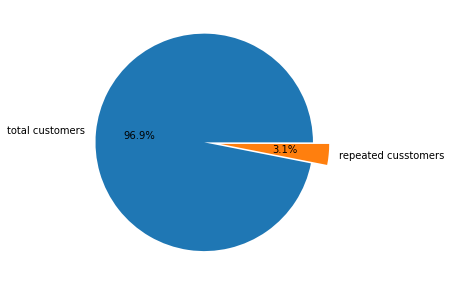

In [184]:
size=[len(hotel_df),3810]
labels=['total customers','repeated cusstomers']
explode=(0.05,0.1)
plt.pie(size,labels=labels,explode=explode,autopct='%1.1f%%')

Just 3.1% customers revisit.Most of customers are new.

Text(0.5, 1.0, 'Graph showing whether guest is repeated guest')

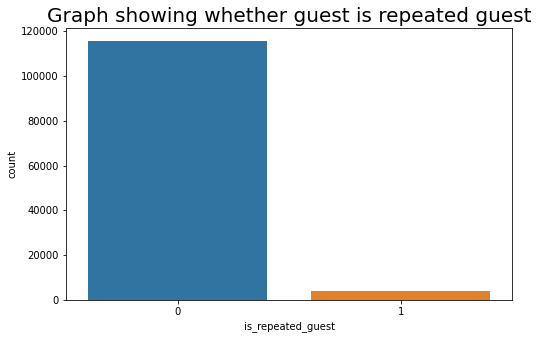

In [185]:
sns.countplot(data = hotel_df, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)


Let's have a look at family size which will visit against different customer bookings. 

First look at the families who have at least one children.

In [323]:
hotel_df[(hotel_df['children']!=0)&(hotel_df['adults']!=0)]['children'].groupby(hotel_df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,4883.0,1.391563,0.507892,1.0,1.0,1.0,2.0,3.0
Resort Hotel,3484.0,1.479621,0.529235,1.0,1.0,1.0,2.0,10.0


In [187]:
hotel_df[(hotel_df['children']!=0)&(hotel_df['adults']!=0)]['adults'].groupby(hotel_df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,4887.0,1.963986,0.298606,1.0,2.0,2.0,2.0,3.0
Resort Hotel,3484.0,2.076636,0.383607,1.0,2.0,2.0,2.0,4.0


In [188]:
hotel_df[(hotel_df['children']!=0)&(hotel_df['adults']!=0)&(hotel_df['is_canceled']==0)&(hotel_df['babies']!=0)][['adults','children','babies']].aggregate({'adults':'mean','children':'mean','babies':'mean'})

adults      2.000000
children    1.122302
babies      1.021583
dtype: float64

Average family size for families having -

1.   both children and babies
2.   only babies no children
3.   only children no babies
4.   only adults







Both babies and children.

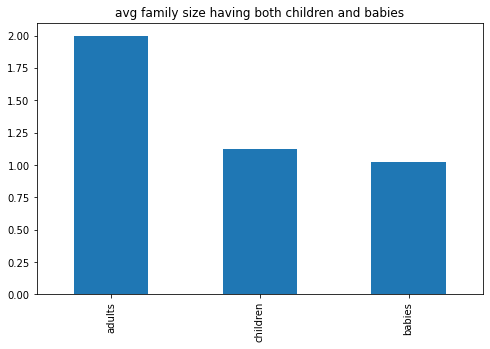

In [189]:
hotel_df[(hotel_df['children']!=0)&(hotel_df['adults']!=0)&(hotel_df['is_canceled']==0)&(hotel_df['babies']!=0)][['adults','children','babies']].aggregate({'adults':'mean','children':'mean','babies':'mean'}).plot(kind='bar',title='avg family size having both children and babies')

Only babies no children

In [190]:
hotel_df[(hotel_df['babies']!=0)&(hotel_df['adults']!=0)&(hotel_df['is_canceled']==0)&(hotel_df['children']==0)][['adults','children','babies']].aggregate({'adults':'mean','children':'mean','babies':'mean'})

adults      2.006568
children    0.000000
babies      1.044335
dtype: float64

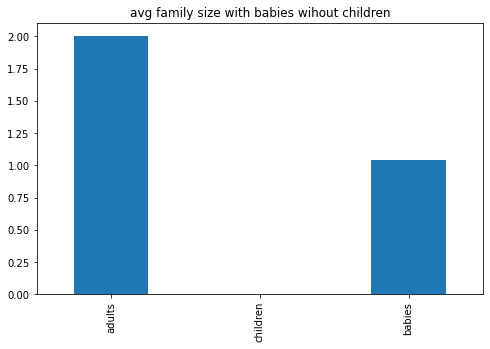

In [191]:
hotel_df[(hotel_df['babies']!=0)&(hotel_df['adults']!=0)&(hotel_df['is_canceled']==0)&(hotel_df['children']==0)][['adults','children','babies']].aggregate({'adults':'mean','children':'mean','babies':'mean'}).plot(kind='bar',title='avg family size with babies wihout children')

Only children no babies.

In [192]:
hotel_df[(hotel_df['babies']==0)&(hotel_df['adults']!=0)&(hotel_df['is_canceled']==0)&(hotel_df['children']!=0)][['adults','children','babies']].aggregate({'adults':'mean','children':'mean','babies':'mean'})

adults      1.996915
children    1.398959
babies      0.000000
dtype: float64

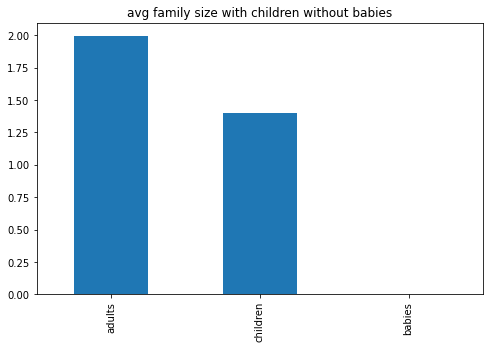

In [193]:
hotel_df[(hotel_df['babies']==0)&(hotel_df['adults']!=0)&(hotel_df['is_canceled']==0)&(hotel_df['children']!=0)][['adults','children','babies']].aggregate({'adults':'mean','children':'mean','babies':'mean'}).plot(kind='bar',title='avg family size with children without babies')

In [194]:
hotel_df['adults'].groupby(hotel_df['hotel']).describe()


,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Resort Hotel,40060.0,1.867149,0.697285,0.0,2.0,2.0,2.0,55.0


In [195]:
hotel_df['children'].groupby(hotel_df['hotel']).describe()


,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79326.0,0.091370,0.372177,0.0,0.0,0.0,0.0,3.0
Resort Hotel,40060.0,0.128682,0.445195,0.0,0.0,0.0,0.0,10.0


In [196]:
hotel_df_notcanceled=hotel_df[hotel_df['is_canceled']==0]

In [197]:
hotel_df_notcanceled.shape

(75166, 32)

What kind of family visit the most??

Text(0.5, 1.0, 'number of visitors in group plot')

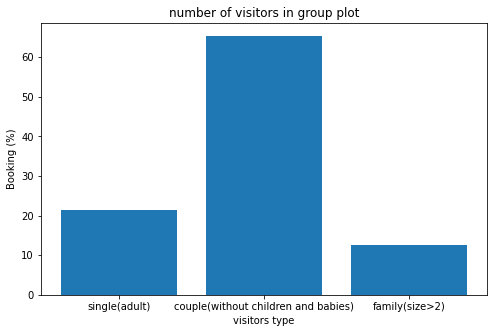

In [198]:
single=hotel_df_notcanceled[(hotel_df_notcanceled['adults']==1)&(hotel_df_notcanceled['children']==0)&(hotel_df_notcanceled['babies']==0)]
couple=hotel_df_notcanceled[(hotel_df_notcanceled['adults']==2)&(hotel_df_notcanceled['children']==0)&(hotel_df_notcanceled['babies']==0)]
family=hotel_df_notcanceled[hotel_df_notcanceled['adults']+hotel_df_notcanceled['children']+hotel_df_notcanceled['babies']>2]
visitors_list=['single(adult)','couple(without children and babies)','family(size>2)']
count_list=[single.shape[0],couple.shape[0],family.shape[0]]
count_perc=[x/hotel_df_notcanceled.shape[0]*100 for x in count_list]
plt.bar(visitors_list,count_perc)
plt.xlabel('visitors type')
plt.ylabel('Booking (%)')
plt.title('number of visitors in group plot')

In [252]:
family.groupby('hotel').aggregate({'adults':'mean','children':'mean','babies':'mean'})

,adults,children,babies
hotel,,,
City Hotel,2.477479,0.682599,0.052495
Resort Hotel,2.318836,0.904019,0.134973


Families having both children and babies prefer Resort type hotel more.

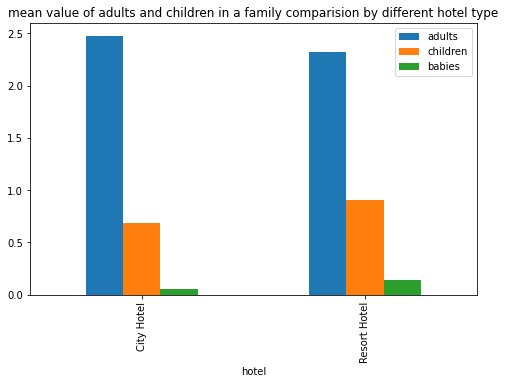

In [253]:
family.groupby('hotel').aggregate({'adults':'mean','children':'mean','babies':'mean'}).plot(kind='bar',title='mean value of adults and children in a family comparision by different hotel type')

In [249]:
couple.groupby('hotel').aggregate({'adults':'sum','children':'sum'})

,adults,children
hotel,,
City Hotel,58872,0.0
Resort Hotel,39400,0.0


In [248]:
single.groupby('hotel').aggregate({'adults':'sum','children':'sum'})

,adults,children
hotel,,
City Hotel,10192,0.0
Resort Hotel,5830,0.0


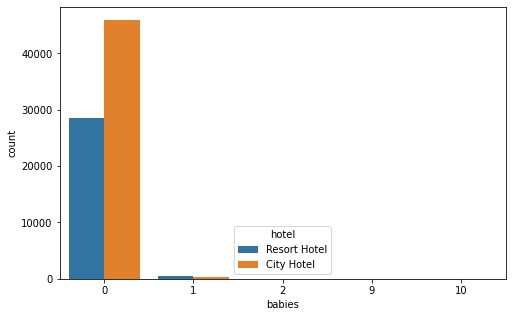

In [241]:
sns.countplot(data=hotel_df_notcanceled,x='babies',hue='hotel')

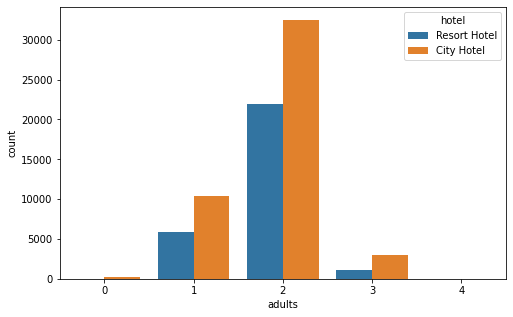

In [201]:
sns.countplot(data=hotel_df_notcanceled,x='adults',hue='hotel')

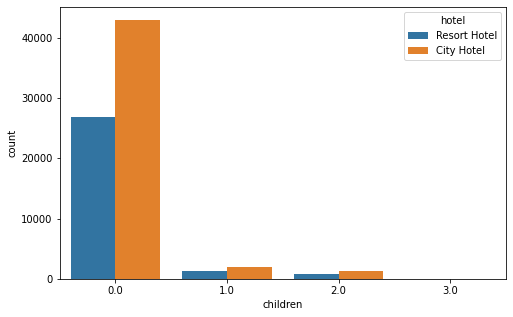

In [202]:
sns.countplot(data=hotel_df_notcanceled,x='children',hue='hotel')

This Data is from which countries??Lets have a look at them.

In [203]:
hotel_df[['adr','country']].groupby('country').aggregate({'adr':'count'}).rename(columns={'adr':'count'}).sort_values('count',ascending=False).head(10)

,count
country,
PRT,48590
GBR,12129
FRA,10415
ESP,8568
DEU,7287
ITA,3766
IRL,3375
BEL,2342
BRA,2224


In [208]:
hotel_df['country'].nunique()

177

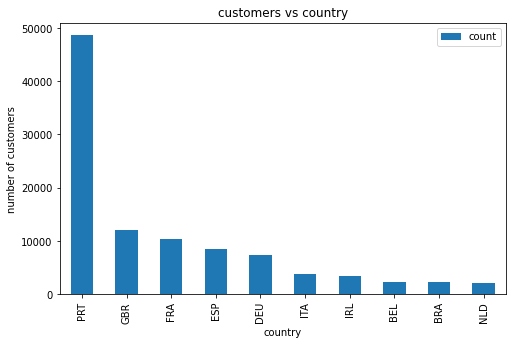

In [204]:
hotel_df[['adr','country']].groupby('country').aggregate({'adr':'count'}).rename(columns={'adr':'count'}).sort_values('count',ascending=False).head(10).plot(kind='bar',title='customers vs country',ylabel='number of customers')

Most of the data is from european countries.

In [158]:
hotel_df[['adr','country','hotel']].groupby(['country','hotel']).aggregate({'adr':'count'}).rename(columns={'adr':'count'}).sort_values('count',ascending=False).head(10)

count
country hotel              
PRT     City Hotel    30960
        Resort Hotel  17630
FRA     City Hotel     8804
GBR     Resort Hotel   6814
DEU     City Hotel     6084
GBR     City Hotel     5315
ESP     City Hotel     4611
        Resort Hotel   3957
ITA     City Hotel     3307
IRL     Resort Hotel   2166

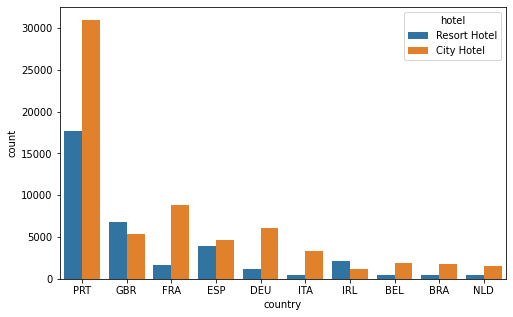

In [212]:
sns.countplot(data=hotel_df,x='country',hue='hotel',order=hotel_df['country'].value_counts().iloc[:10].index)

Let's analyse average daily rate.Its variation for different months.Which year has highest average adr??Which countries have highsest average adr??We will try to get answers of these questions in this analysis.

In [213]:
hotel_df['adr'].index

RangeIndex(start=0, stop=119390, step=1)

First we will try to compare mean adr for all 3 years with average adr for each months and try to analyse which month  has highest average adr.

In [219]:
hotel_df_valid_adr=hotel_df[hotel_df['adr']!=0]

In [220]:
rate_df=hotel_df_valid_adr['adr']
adr_mean_list=[hotel_df_valid_adr['adr'].mean()]*len(hotel_df_valid_adr)
adr_df=pd.DataFrame({'adr':rate_df,'mean_adr':adr_mean_list})

In [162]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [163]:
year_month_df=hotel_df[['arrival_date_year','arrival_date_month']]

In [222]:
adr_df=pd.concat([adr_df,hotel_df_valid_adr[['arrival_date_year','arrival_date_month']]],axis=1)

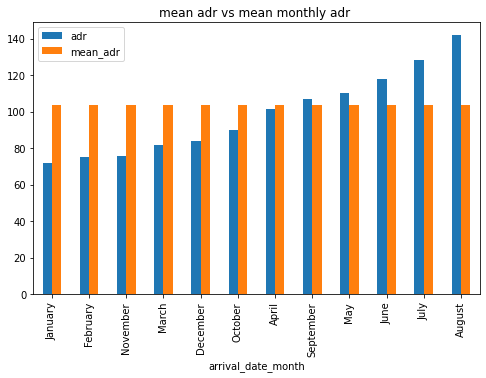

In [224]:
adr_df.groupby('arrival_date_month').aggregate({'adr':'mean','mean_adr':'mean'}).sort_values('adr').plot(kind='bar',title='mean adr vs mean monthly adr ')

Which year has highest average adr??2017 is answer.Most probably due to inflation.

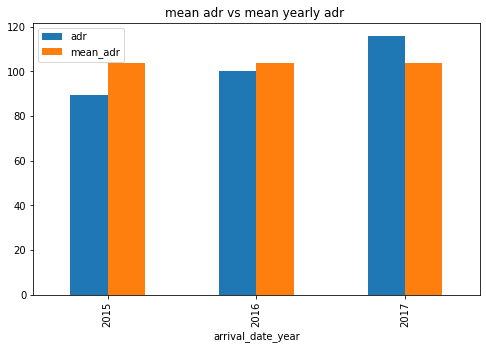

In [227]:
adr_df.groupby('arrival_date_year').aggregate({'adr':'mean','mean_adr':'mean'}).sort_values('adr').plot(kind='bar',title='mean adr vs mean yearly adr ')

Which countries have highest adr??

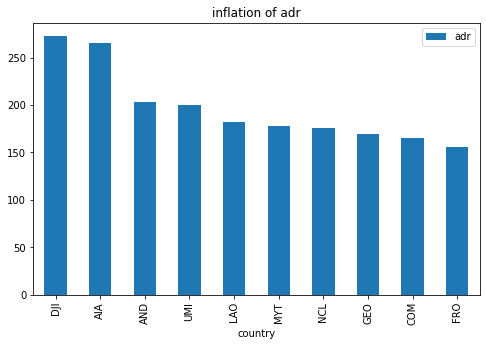

In [268]:
hotel_df[hotel_df['adr']!=0].groupby('country').aggregate({'adr':'mean'}).sort_values('adr',ascending=False).head(10).plot(kind='bar',title='inflation of adr')

Let us analyse through what distribution channel do customer have their bookings done.

How many distribution channels are there??

In [228]:
hotel_df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

There are 4 distribution channel out of which online TA is most preferred followed by direct bookings. 

In [229]:
import matplotlib.pyplot as plt


([<matplotlib.patches.Wedge at 0x7efcc5979bd0>,
 [Text(-0.9704935663433553, 0.616962103930343, 'TA/TO'),
  Text(0.8803316828916316, -0.8154852102259047, 'Direct'),
  Text(1.1792762025132837, -0.2220532327750468, 'Corporate'),
  Text(1.1999828786331883, -0.006410225207232818, 'GDS'),
  Text(2.099999981769331, -0.0002767106933115512, 'Undefined')],
 [Text(-0.5485398418462443, 0.34871771091715037, '82.0%'),
  Text(0.5135268150201183, -0.4756997059651111, '12.3%'),
  Text(0.6879111181327486, -0.1295310524521106, '5.6%'),
  Text(0.6999900125360263, -0.0037392980375524766, '0.2%'),
  Text(1.5999999861099665, -0.00021082719490403897, '0.0%')])

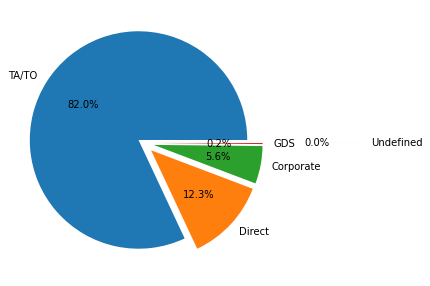

In [230]:
dist_ch=hotel_df['distribution_channel'].value_counts().tolist()
labels=hotel_df['distribution_channel'].value_counts().index.tolist()
explode=(0.05,0.1,0.1,0.1,1)
plt.pie(dist_ch,labels=labels,explode=explode,autopct='%1.1f%%')

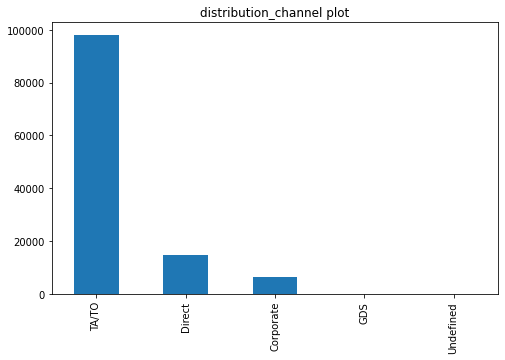

In [231]:
hotel_df['distribution_channel'].value_counts().plot(kind='bar',title='distribution_channel plot')

Let's analyse market segment column.

In [170]:
hotel_df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

There are 8 subcategories in this column out of which again online travelling agent is most preferred.

[Text(0.5, 1.0, 'number of customers booking hotel through diff ways')]

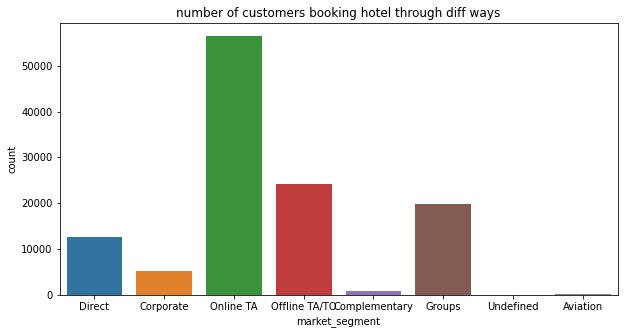

In [172]:
sns.countplot(data = hotel_df, x = 'market_segment').set(title='number of customers booking hotel through diff ways')

In [173]:
hotel_df[['hotel','distribution_channel']].groupby(['hotel','distribution_channel']).aggregate({'hotel':'count'})

hotel
hotel        distribution_channel       
City Hotel   Corporate              3408
             Direct                 6780
             GDS                     193
             TA/TO                 68945
             Undefined                 4
Resort Hotel Corporate              3269
             Direct                 7865
             TA/TO                 28925
             Undefined                 1

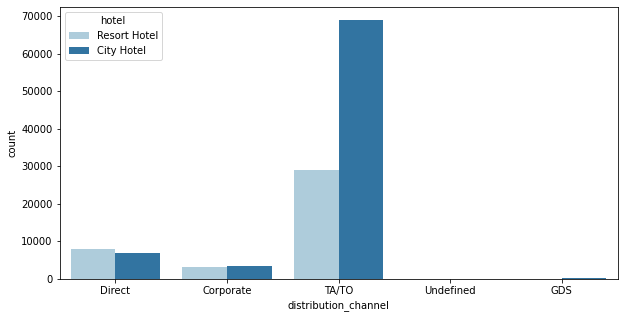

In [174]:
sns.countplot(x='distribution_channel',data=hotel_df,hue='hotel',palette='Paired')

In [175]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

13